In [1]:
from google.colab import files

In [2]:
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,0,1,178,0,0,2,

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest,f_classif

In [6]:
df=pd.read_csv('heart.csv')

In [7]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


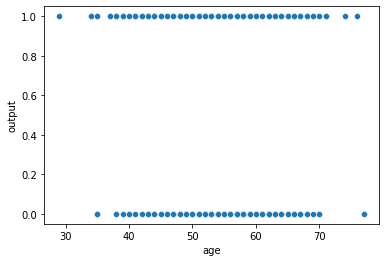

In [8]:
sns.scatterplot(x='age',y='output',data=df)

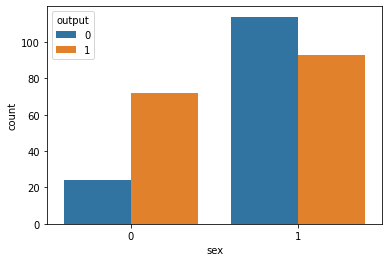

In [29]:
sns.countplot(x='sex',hue='output',data=df)

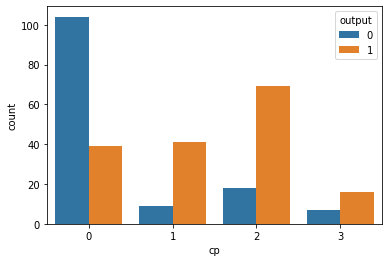

In [30]:
sns.countplot(x='cp',hue='output',data=df)

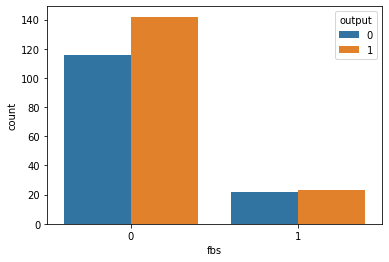

In [31]:
sns.countplot(x='fbs',hue='output',data=df)

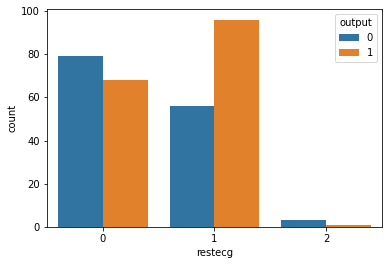

In [32]:
sns.countplot(x='restecg',hue='output',data=df)

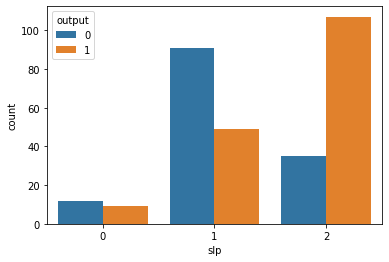

In [33]:
sns.countplot(x='slp',hue='output',data=df)

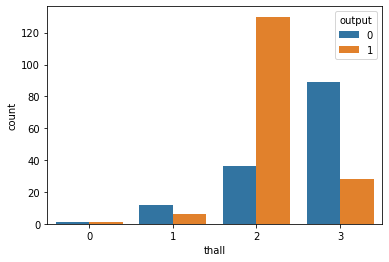

In [34]:
sns.countplot(x='thall',hue='output',data=df)

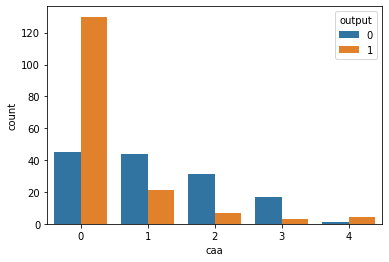

In [35]:
sns.countplot(x='caa',hue='output',data=df)

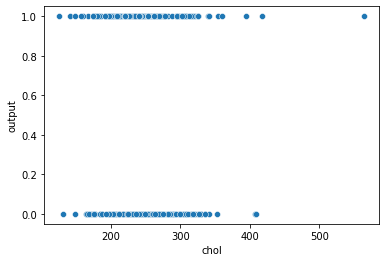

In [36]:
sns.scatterplot(x='chol',y='output',data=df)

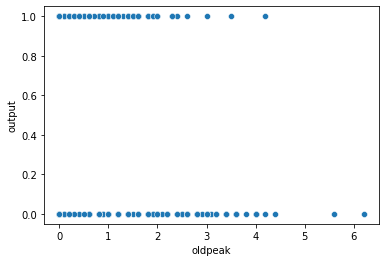

In [37]:
sns.scatterplot(x='oldpeak',y='output',data=df)

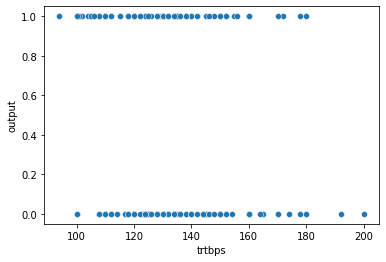

In [38]:
sns.scatterplot(x='trtbps',y='output',data=df)

In [39]:
x=df.drop(['output'],axis=1)
y=df['output']

In [42]:
Feature=SelectKBest()

In [43]:
Feature.fit(x,y)

SelectKBest()

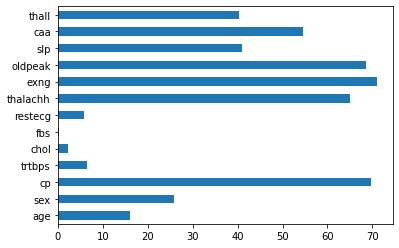

In [45]:
pd.Series(Feature.scores_,index=x.columns).plot(kind='barh')

In [46]:
top=list(pd.Series(Feature.scores_,index=x.columns).nlargest(9).keys())

In [47]:
x=df[top]

In [48]:
Extra=ExtraTreesClassifier(n_estimators=10)

In [49]:
Extra.fit(x,y)

ExtraTreesClassifier(n_estimators=10)

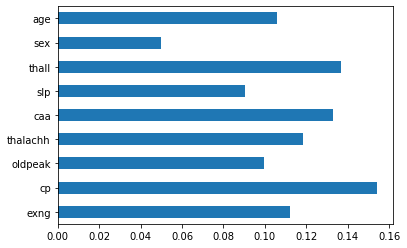

In [50]:
pd.Series(Extra.feature_importances_,index=x.columns).plot(kind='barh')

In [51]:
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)

In [52]:
Forest=RandomForestClassifier(n_estimators=35)
Tree=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_neighbors=19)
Support=SVC(gamma='auto')
GNB=GaussianNB()
BNB=BernoulliNB()
Logi=LogisticRegression()

In [53]:
Algo=[Forest,Tree,KNN,Support,GNB,BNB,Logi]

In [55]:
Algo_name=["RFC","DTC","KNN","SVM","GNB","BNB","Logi"]
Scores=[]
Average=[]
for i in Algo:
  cv_score=cross_val_score(i,Scaled_x,y,cv=10)
  Scores.append(cv_score)
  Average.append(cv_score.mean())

In [57]:
Algo_name=pd.DataFrame(Algo_name,columns=['Algorithm name'])
Scores=pd.DataFrame(Scores)
Average=pd.DataFrame(Average,columns=['Average'])

In [58]:
Table=pd.concat([Algo_name,Scores],axis=1)
Table=pd.concat([Table,Average],axis=1)
Table

,Algorithm name,0,1,2,3,4,5,6,7,8,9,Average
0,RFC,0.870968,0.870968,0.903226,0.900000,0.866667,0.800000,0.766667,0.866667,0.733333,0.800000,0.837849
1,DTC,0.709677,0.774194,0.838710,0.733333,0.733333,0.633333,0.700000,0.833333,0.700000,0.600000,0.725591
2,KNN,0.903226,0.806452,0.838710,0.900000,0.866667,0.833333,0.866667,0.866667,0.700000,0.766667,0.834839
3,SVM,0.870968,0.806452,0.838710,0.900000,0.900000,0.766667,0.833333,0.833333,0.733333,0.833333,0.831613
4,GNB,0.806452,0.774194,0.870968,0.900000,0.833333,0.800000,0.900000,0.800000,0.766667,0.700000,0.815161
5,BNB,0.838710,0.774194,0.806452,0.933333,0.866667,0.900000,0.866667,0.833333,0.700000,0.833333,0.835269
6,Logi,0.903226,0.774194,0.838710,0.866667,0.833333,0.800000,0.866667,0.933333,0.700000,0.733333,0.824946


In [59]:
Average=list(Table['Average'])

In [60]:
Best=Algo[Average.index(max(Average))]

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(Scaled_x,y,test_size=0.1,random_state=1)

In [62]:
Best.fit(Scaled_x,y)

RandomForestClassifier(n_estimators=35)

In [63]:
Best.score(xtest,ytest)

1.0

In [64]:
Best.score(Scaled_x,y)

1.0

In [71]:
Algo_name1=[("RFC",Forest),("DTC",Tree),("KNN",KNN),("SVM",Support),("GNB",GNB),("BNB",BNB)]

In [72]:
from sklearn.ensemble import StackingClassifier
Lr=LogisticRegression()
Stacking=StackingClassifier(estimators=Algo_name1,final_estimator=Lr)

In [73]:
Stacking.fit(xtrain,ytrain)

StackingClassifier(estimators=[('RFC', RandomForestClassifier(n_estimators=35)),
                               ('DTC', DecisionTreeClassifier()),
                               ('KNN', KNeighborsClassifier(n_neighbors=19)),
                               ('SVM', SVC(gamma='auto')),
                               ('GNB', GaussianNB()), ('BNB', BernoulliNB())],
                   final_estimator=LogisticRegression())

In [74]:
Stacking.score(Scaled_x,y)

0.8844884488448845

In [75]:
Stacking.score(xtest,ytest)

0.9032258064516129

In [77]:
import keras
from keras.layers import Dense

In [96]:
Model=keras.Sequential([
                        Dense(35,activation='relu',input_dim=9),
                        Dense(95,activation='relu'),
                        Dense(1,activation='sigmoid')
])

In [97]:
Model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [98]:
Model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
9/9 [==============================] - 1s 3ms/step - loss: 0.6705 - accuracy: 0.6066
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.5650 - accuracy: 0.8088
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.8346
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8272
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8235
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8382
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.3696 - accuracy: 0.8382
Epoch 8/10
9/9 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8456
Epoch 9/10
9/9 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.8529
Epoch 10/10
9/9 [==============================] - 0s 3ms/step - loss: 0.3430 - accuracy: 0.8566


In [99]:
Model.evaluate(xtest,ytest)

1/1 [==============================] - 0s 124ms/step - loss: 0.3606 - accuracy: 0.8710


[0.3605949282646179, 0.8709677457809448]